In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
print(df.shape[0]) # rows
print(df.shape[1]) # columns

891
12


there are 891 rows and 12 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


there is presence of null values 

In [7]:
# Lets sort columns by their Datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']}

Observation :
This Dataset contains 891 rows & 12 columns.
Our objective is to predict survival using classification algorithim and our target variable is 'Survived'.
We have 5 features with object datatypes & rest are numerical features.

In [8]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

             Missing Values  % Missing data
Cabin                   687       77.104377
Age                     177       19.865320
Embarked                  2        0.224467
PassengerId               0        0.000000
Survived                  0        0.000000
Pclass                    0        0.000000
Name                      0        0.000000
Sex                       0        0.000000
SibSp                     0        0.000000
Parch                     0        0.000000
Ticket                    0        0.000000
Fare                      0        0.000000


Features "Age","Cabin","Embarked" contain null values. dropping cabin as 77.1 % of its values are missing.

In [9]:
df.drop('Cabin',axis=1,inplace=True)

In [10]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C


In [11]:
# Removing rows where embarked=nan
df.dropna(subset=['Embarked'], inplace=True)

# Verifying that missing values have been removed
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


In [12]:
df.shape

(889, 11)

Now we have 889 rows and 10 columns

In [13]:
# Checking for number of unique values per feature
df.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

"Survived" - Target / Label column has 2 categories.
"sex" - Feature column has 2 categories.
"Pclass" - Feature column has 2 values.
"Embarked" - Feature column has 3 categories.
"SibSp" - Feature column has 7 discrete values.
"Parch" - Feature column has 7 discrete values.

### Statistical Summary

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df.describe(include= object)

,Name,Sex,Ticket,Embarked
count,889,889,889,889
unique,889,2,680,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,644


#### Checking number of people survived

In [16]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

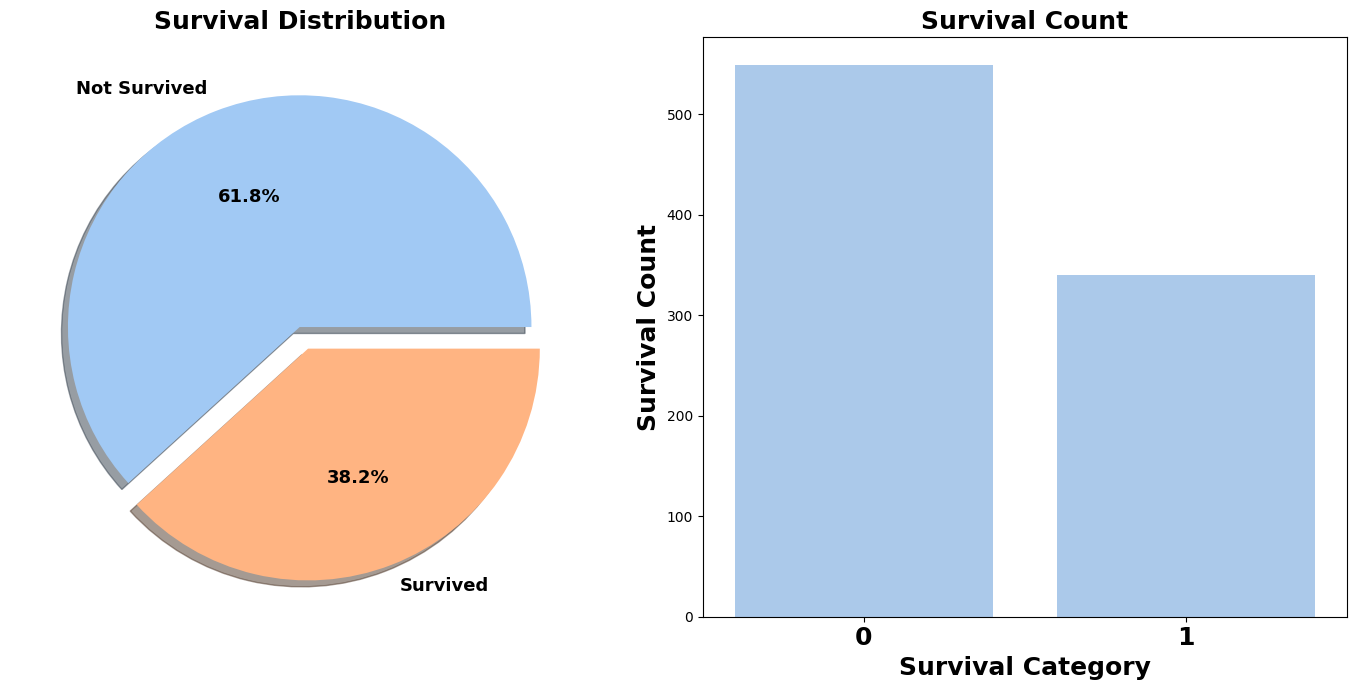

In [17]:
# Setting global figure autolayout
plt.rcParams["figure.autolayout"] = True

# Setting color palette 
sns.set_palette('pastel')

# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for survival distribution
survival_counts = df['Survived'].value_counts()
ax[0].pie(survival_counts, explode=[0, 0.1], labels=['Not Survived', 'Survived'], autopct='%2.1f%%', shadow=True, textprops={'fontsize': 13, 'fontweight': 'bold'})
ax[0].set_title('Survival Distribution', fontsize=18, fontweight='bold')
ax[0].set_ylabel('')

# Count plot for survival count
sns.countplot(x='Survived', data=df, ax=ax[1])  # Here we specify 'x' for the x-axis variable
ax[1].set_title('Survival Count', fontsize=18, fontweight='bold')
ax[1].set_xlabel("Survival Category", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Survival Count", fontsize=18, fontweight='bold')

# Setting tick parameters
plt.xticks(fontsize=18, fontweight='bold')


plt.show()


Most of the people did not survived

In [18]:
# genderwise survival
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           231
male    0           468
        1           109
Name: Survived, dtype: int64

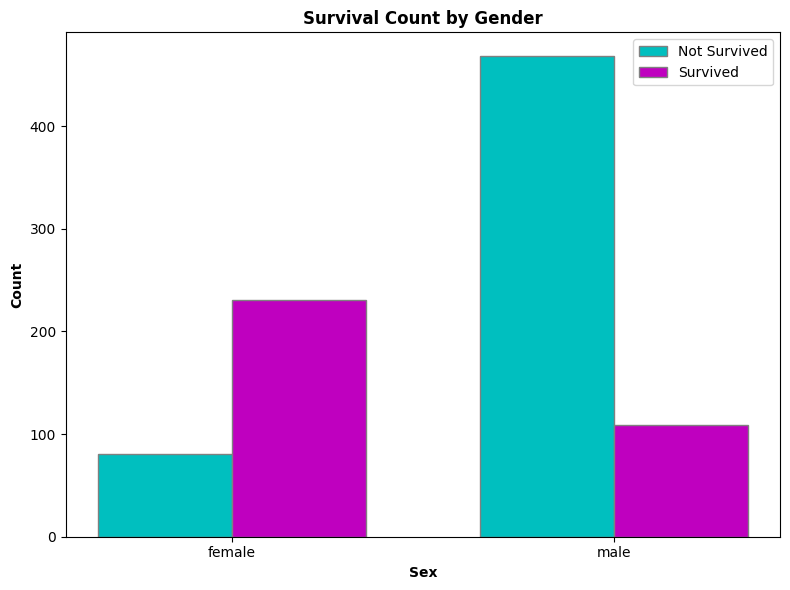

In [19]:
data = {
    'Sex': ['female', 'male'],
    'Survived_0': [81, 468],  # Number of females and males who did not survive
    'Survived_1': [231, 109]  # Number of females and males who survived
}

# Converting data to DataFrame
df1 = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35

# Positions for bars
r1 = range(len(df1))
r2 = [x + bar_width for x in r1]

# Creating bars for survival and non-survival counts
plt.bar(r1, df1['Survived_0'], color='c', width=bar_width, edgecolor='grey', label='Not Survived')
plt.bar(r2, df1['Survived_1'], color='m', width=bar_width, edgecolor='grey', label='Survived')

# Add labels and title
plt.xlabel('Sex', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(df1))], df1['Sex'])
plt.title('Survival Count by Gender', fontweight='bold')

# Adding legend
plt.legend()
plt.show()

Number of females survived is higher than that of males

In [20]:
survival_counts_classwise = df.groupby('Pclass')['Survived'].sum()
print(survival_counts_classwise)

Pclass
1    134
2     87
3    119
Name: Survived, dtype: int64


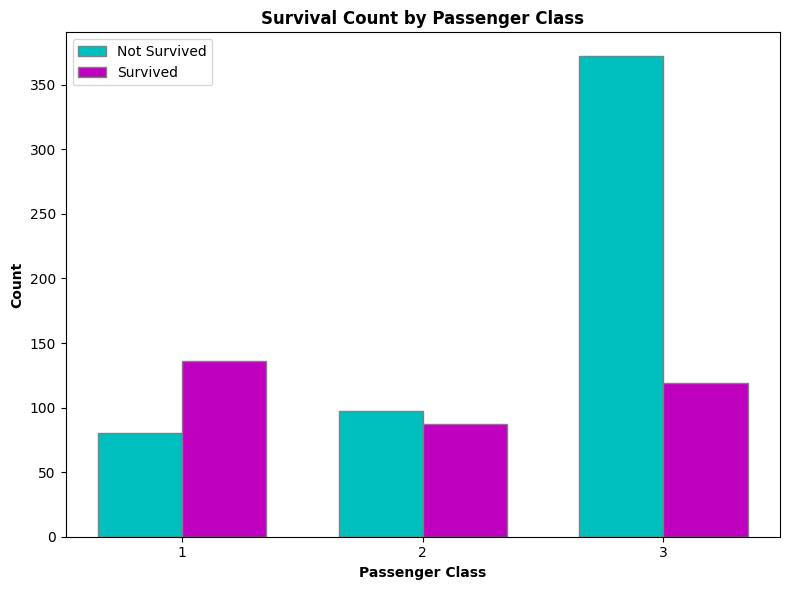

In [21]:
# Exploring Pclass Vs survival
# Data
data = {
    'Pclass': [1, 2, 3],
    'Survived_0': [80, 97, 372],  # Number of non-survivors for each class
    'Survived_1': [136, 87, 119]  # Number of survivors for each class
}

# Convert data to DataFrame
df11 = pd.DataFrame(data)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Width of each bar
bar_width = 0.35

# Positions for bars
r1 = range(len(df11))
r2 = [x + bar_width for x in r1]

# Create bars for survival and non-survival counts
plt.bar(r1, df11['Survived_0'], color='c', width=bar_width, edgecolor='grey', label='Not Survived')
plt.bar(r2, df11['Survived_1'], color='m', width=bar_width, edgecolor='grey', label='Survived')

# Add labels and title
plt.xlabel('Passenger Class', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(df11))], df11['Pclass'])
plt.title('Survival Count by Passenger Class', fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.show()


For Pclass1, % Survived is around 63% while for pclass2 is around 48%. 
We can clearly, see that Passengers of Pclass 1 were given a very high priority while rescue. Even though the the number of passengers in Pclass 3 were a lot higher, still the number of survival from Pclass 3 is very low, somewhere around 25%.

In [22]:
pd.crosstab([df.Sex,df.Survived],df.Pclass, margins= True).style.background_gradient(cmap='summer_r')

Looking at the CrossTab, we can easily infer that survival for Women from Pclass 1 is about 95-96%, as only 3 out of 94 Women from Pclass1 died.
It is evident (from CrossTab) that irrespective of pclass, women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

In [23]:
# on the basis of age
print('Oldest Passenger was of:',df['Age'].max(),'Years')
print('Youngest Passenger was of:',df['Age'].min(),'Years')
print('Average Age on th ship :',df['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on th ship : 29.64209269662921 Years


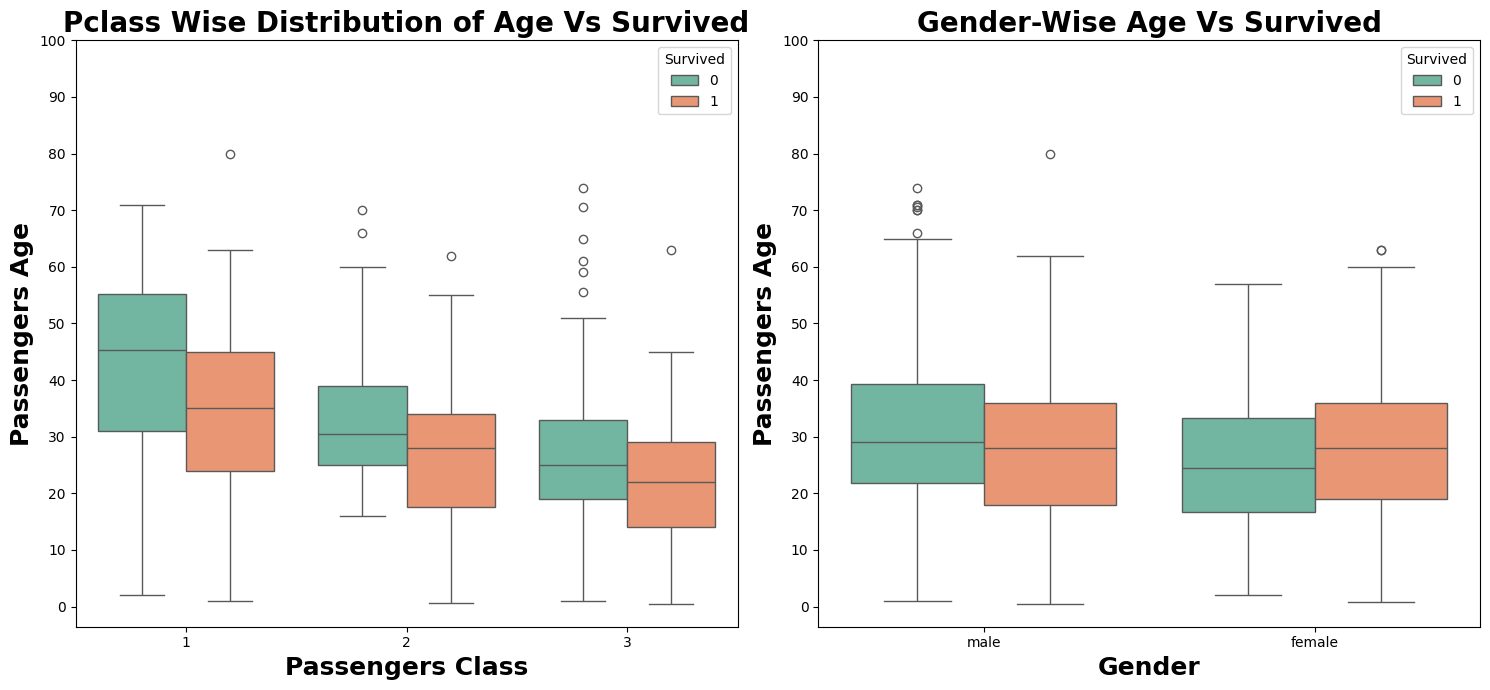

In [24]:
f, ax = plt.subplots(1, 2, figsize=(15, 7))

# Box plot for Pclass wise distribution of Age vs Survived
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df, ax=ax[0], palette='Set2')
ax[0].set_title('Pclass Wise Distribution of Age Vs Survived', fontsize=20, fontweight='bold')
ax[0].set_yticks(range(0, 110, 10))
ax[0].set_ylabel('Passengers Age', fontsize=18, fontweight='bold')
ax[0].set_xlabel('Passengers Class', fontsize=18, fontweight='bold')

# Box plot for Gender-Wise Age vs Survived
sns.boxplot(x='Sex', y='Age', hue='Survived', data=df, ax=ax[1], palette='Set2')
ax[1].set_title('Gender-Wise Age Vs Survived', fontsize=20, fontweight='bold')
ax[1].set_yticks(range(0, 110, 10))
ax[1].set_ylabel('Passengers Age', fontsize=18, fontweight='bold')
ax[1].set_xlabel('Gender', fontsize=18, fontweight='bold')


plt.show()

### Handling Missing Values in Age column

As previously observed, there are 177 null values in the 'Age' feature. Simply assigning the mean age of the dataset to these NaN values may not be appropriate, as it would not accurately reflect the age distribution. For instance, assigning a mean age of 29 years to a 4-year-old child is not ideal. Therefore, an alternative approach is needed for imputing these missing age values.

Upon examining the 'Name' feature, we notice that names include salutations such as Mr. or Mrs. Utilizing this information, we can group individuals based on their salutations and assign the mean age values of these groups accordingly. For instance, we can assign the mean age of individuals with the salutation 'Mr.' to all instances where this salutation appears, and similarly for 'Mrs.' and other salutations. This method provides a more nuanced and accurate way of imputing missing age values based on relevant characteristics in the dataset.

In [25]:
# extracting salutations using regex
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract("([A-Za-z]+)\.") 

In [26]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,181,2,1,0,124,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [27]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [28]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.751678
Mr        32.739609
Mrs       35.743119
Other     45.888889
Name: Age, dtype: float64

In [29]:
df.loc[((df.Age.isnull())&(df.Initial)=='Mr'), 'Age']=32.73
df.loc[((df.Age.isnull())&(df.Initial)=='Mrs'), 'Age']=35.98
df.loc[((df.Age.isnull())&(df.Initial)=='Master'), 'Age']=4.57
df.loc[((df.Age.isnull())&(df.Initial)=='Miss'), 'Age']=21.86
df.loc[((df.Age.isnull())&(df.Initial)=='Other'), 'Age']=45.889

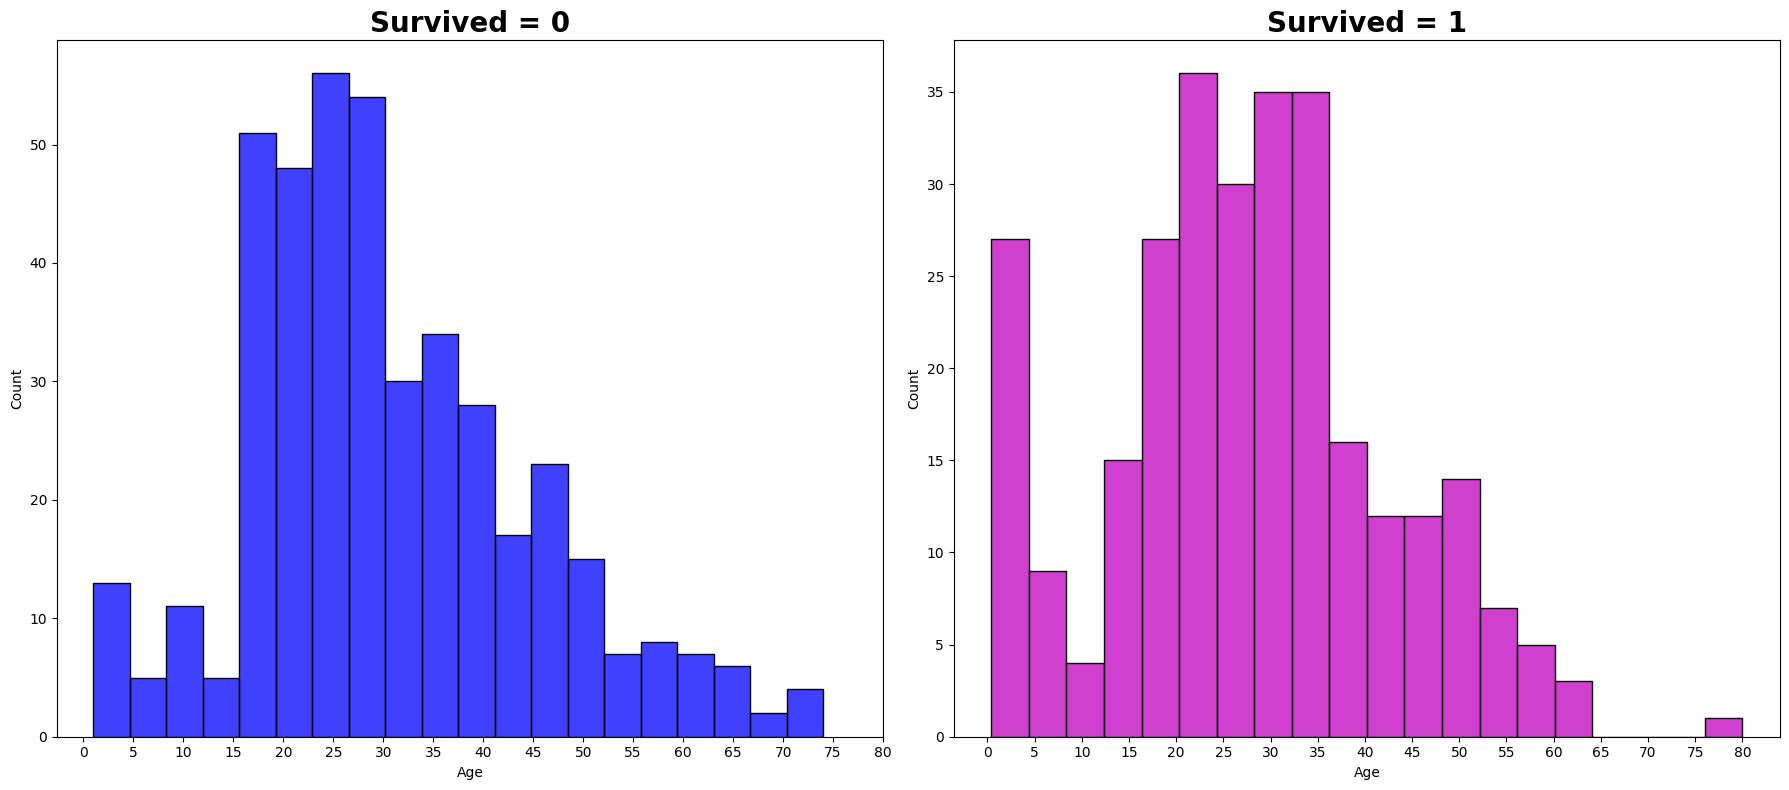

In [31]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Histogram for passengers who did not survive (Survived = 0)
sns.histplot(data=df[df['Survived']==0], x='Age', bins=20, edgecolor='black', color='blue', ax=ax[0])
ax[0].set_title('Survived = 0', fontsize=20, fontweight='bold')
ax[0].set_xticks(range(0, 85, 5))

# Histogram for passengers who survived (Survived = 1)
sns.histplot(data=df[df['Survived']==1], x='Age', bins=20, edgecolor='black', color='m', ax=ax[1])
ax[1].set_title('Survived = 1', fontsize=20, fontweight='bold')
ax[1].set_xticks(range(0, 85, 5))

plt.show()

The Toddlers(age<5) were saved in large numbers. 
The oldest Passenger was saved (80 years).
Maximum number of deaths were in age group of 30-40.

In [32]:
# Analysis Embarked vs Survival
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],margins=True).style.background_gradient(cmap='summer_r')

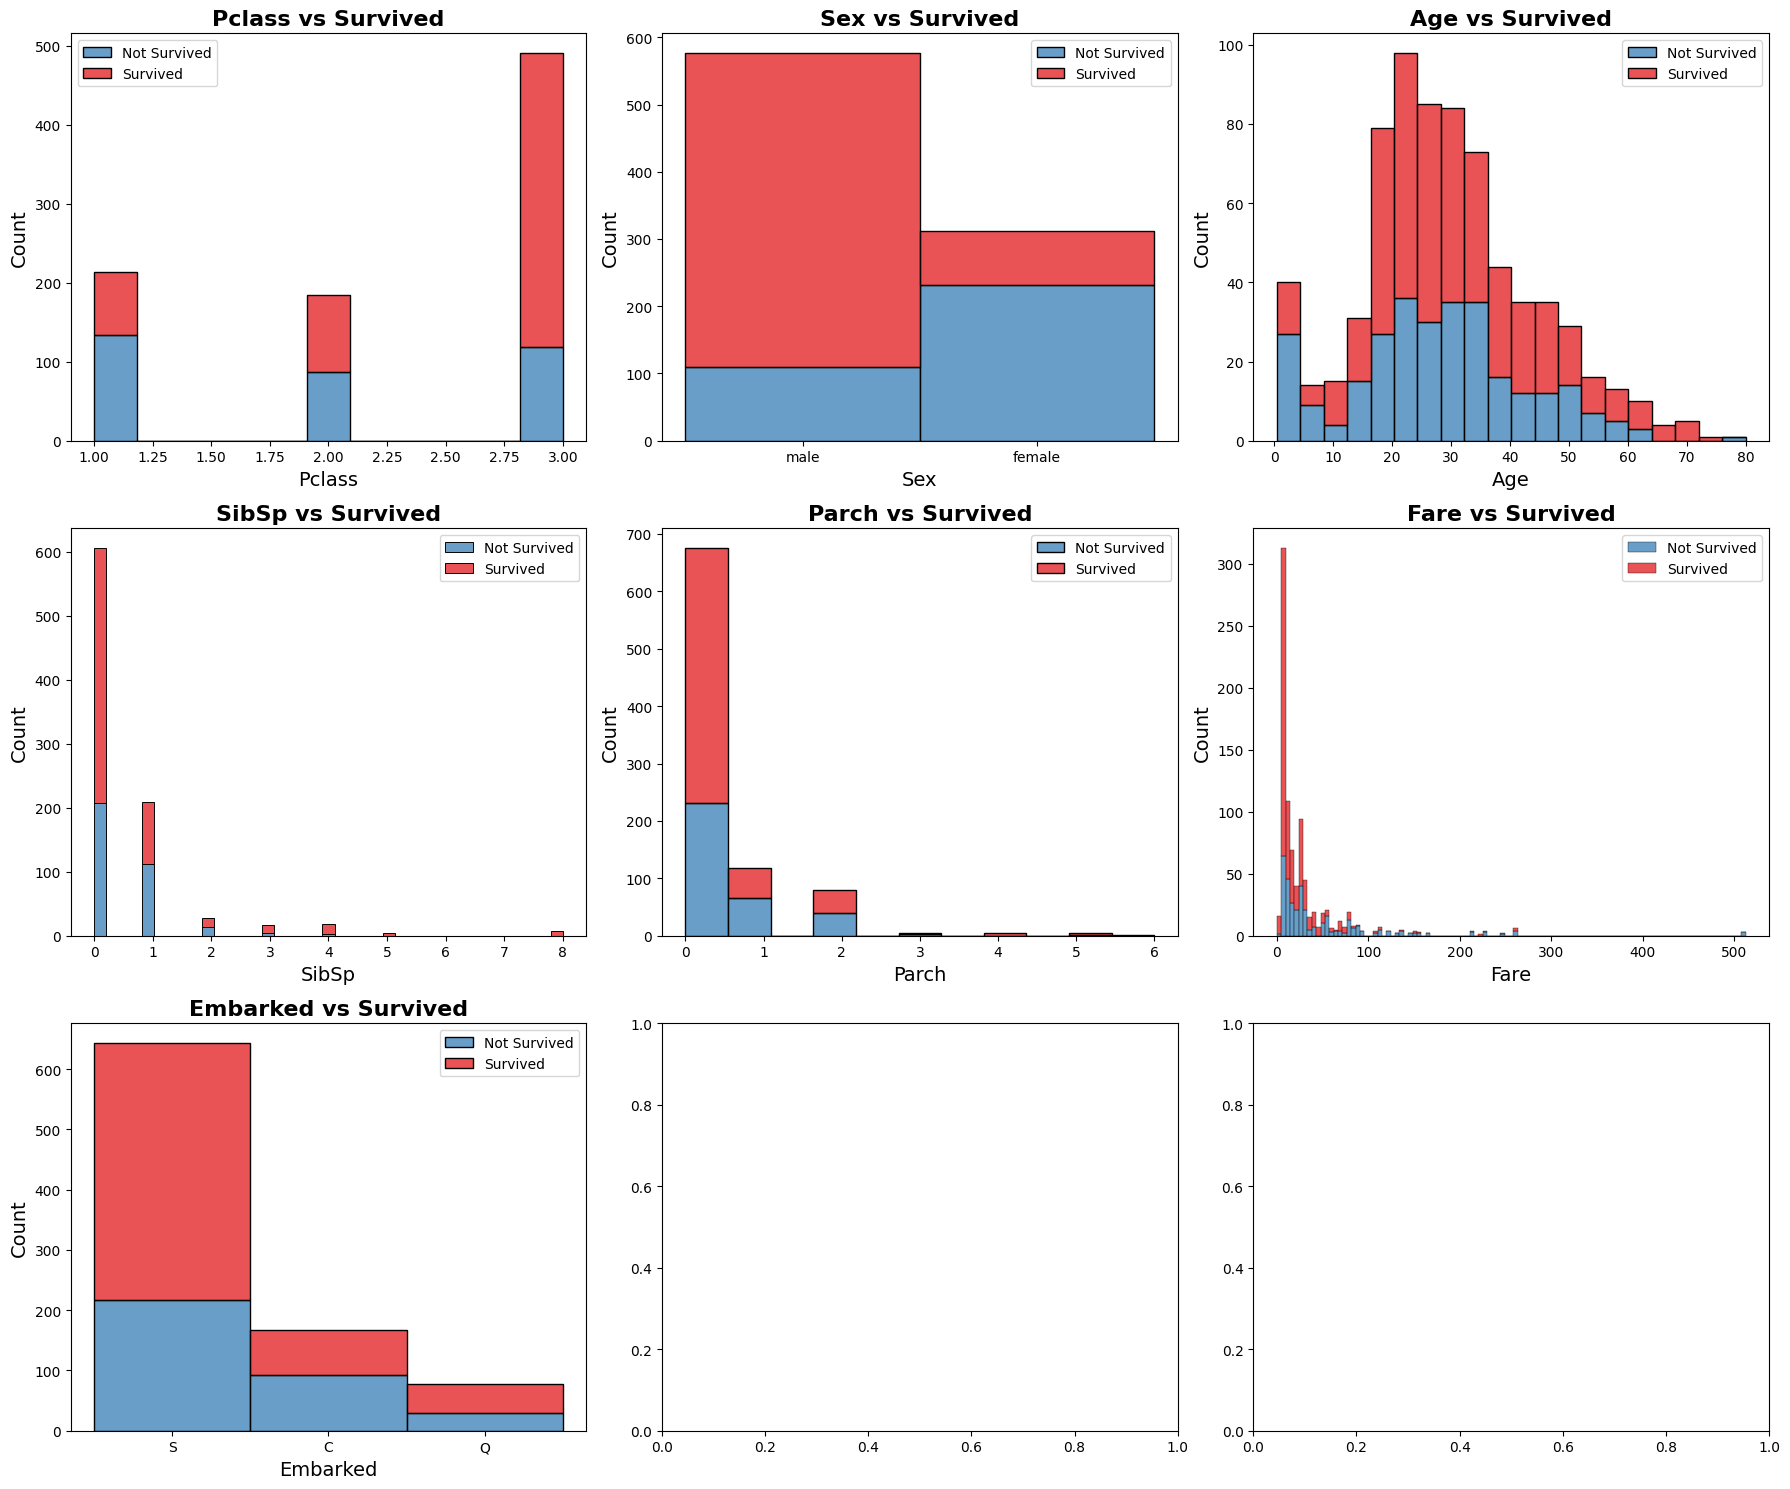

In [34]:
# Defining features to visualize against 'Survived'
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Setting up subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Flattening the axes array for easier iteration
axes = axes.flatten()

# Looping over each feature and create the corresponding plot
for i, feature in enumerate(features):
    sns.histplot(x=feature, hue='Survived', data=df, multiple='stack', ax=axes[i], palette='Set1')
    axes[i].set_title(f'{feature} vs Survived', fontsize=16, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=14)
    axes[i].set_ylabel('Count', fontsize=14)
    axes[i].legend(['Not Survived', 'Survived'])

# Adjusting subplot spacing
plt.tight_layout()

plt.show()

### Correlation

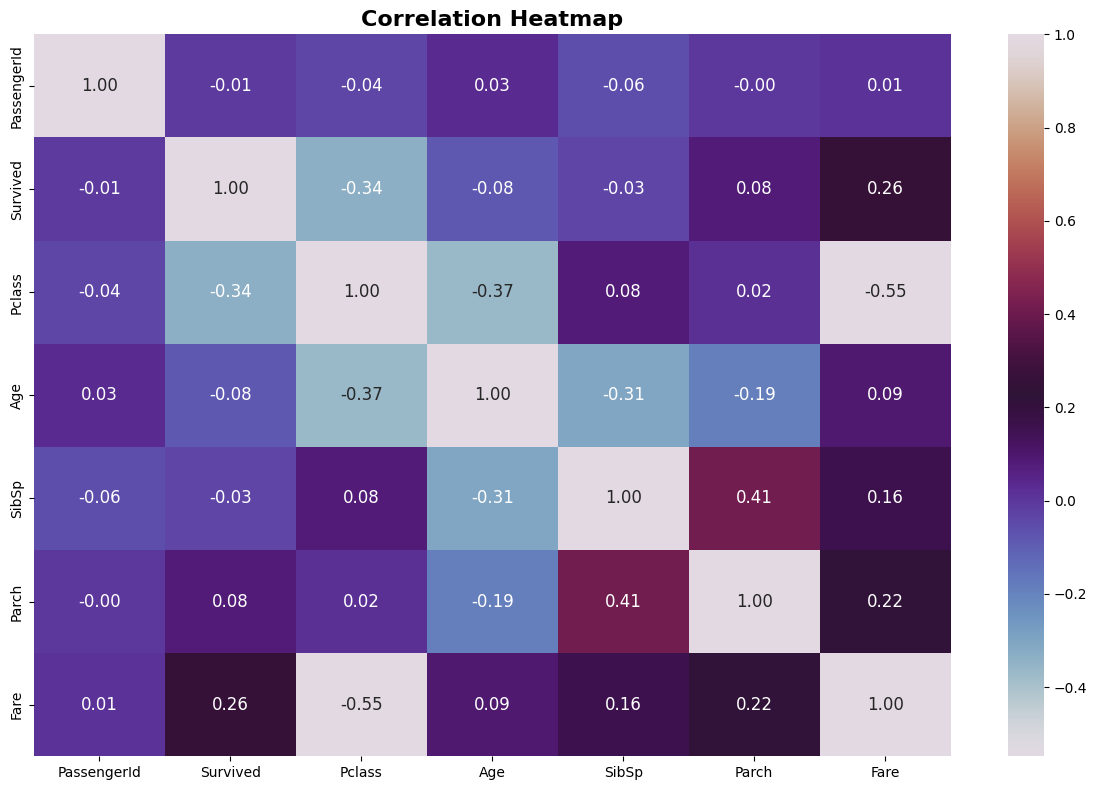

In [36]:
# Computing the correlation matrix
correlation_matrix = df.corr()

# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='twilight', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

In [37]:
# Droping unnecessary column for further investigation
df.drop(["PassengerId", "Name" , "Ticket" ],axis=1,inplace=True)

In [38]:
df.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
595,0,3,male,36.0,1,1,24.15,S,Mr


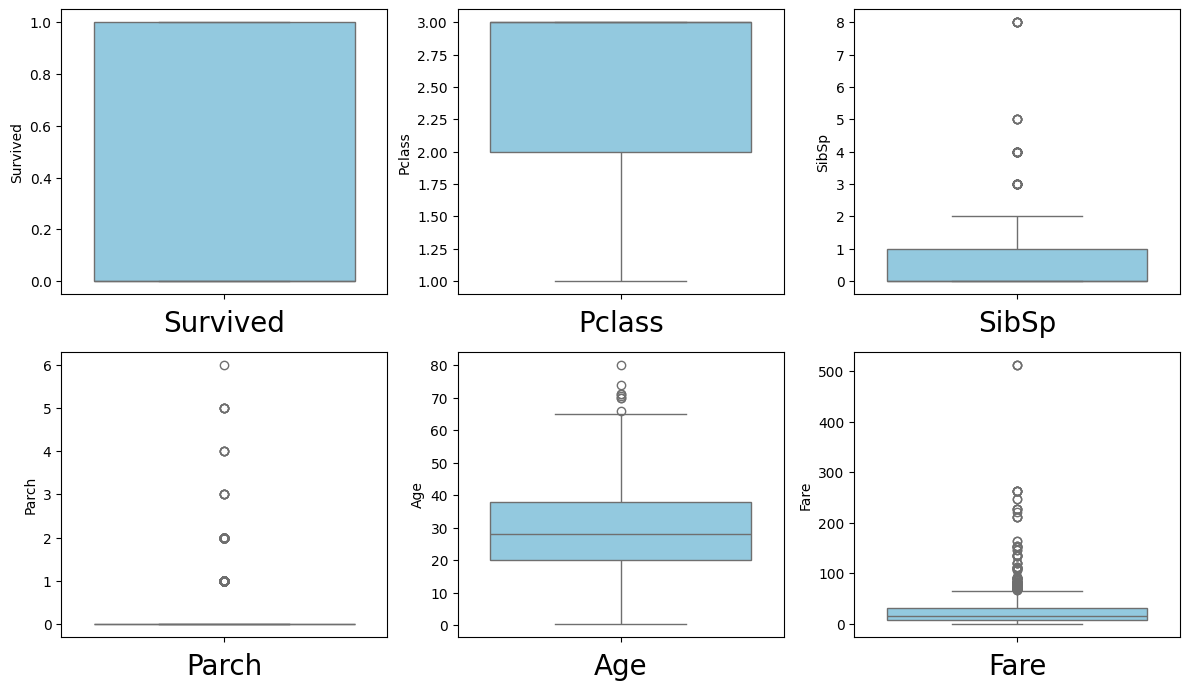

In [39]:
Numerical_features= ['Survived', 'Pclass', 'SibSp', 'Parch','Age', 'Fare']
Categorical_features = ['Sex', 'Embarked', 'Initial']
# Identifying the outliers using boxplot in dataset
plt.figure(figsize=(12,10),facecolor='white')
plotnumber=1
for i in Numerical_features:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i],color='skyblue')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [40]:
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1, Q3 = np.percentile(df[col], [25, 75])
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    return [k for k, v in Counter(outlier_indices).items() if v > n]

In [41]:
# detect outliers from Age, SibSp , Parch and Fare
from collections import Counter
Outliers_to_drop = detect_outliers(df,2,["Age","SibSp","Parch","Fare"])
# Drop outliers
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [42]:
df.shape

(879, 9)

In [44]:
# Filling missing value of Age 

## Fill Age with the median age of similar rows according to Pclass, Parch and SibSp
# Index of NaN age rows
index_NaN_age = list(df["Age"][df["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = df["Age"].median()
    age_pred = df["Age"][((df['SibSp'] == df.iloc[i]["SibSp"]) & (df['Parch'] == df.iloc[i]["Parch"]) & (df['Pclass'] == df.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        df['Age'].iloc[i] = age_pred
    else :
        df['Age'].iloc[i] = age_med

In [45]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Initial     0
dtype: int64

### Encoding Categorical Features

In [46]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    df[i] = le.fit_transform(df[i])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,3
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,2,2


### Standard Scaler

In [47]:
# Splitting data in target and dependent feature
X = df.drop(['Survived'], axis =1)
Y = df['Survived']
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## Machine Learning Model Building

In [48]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Creating instances of classifiers
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
logistic_regression = LogisticRegression()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
# Split your data
X_train, X_test, y_train, y_test = train_test_split(X_scale, Y, test_size=0.3, random_state=42)

# Create instances of classifiers
classifiers = {"Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()}

# Training and evaluating each model
for name, model in classifiers.items():
    print("Training", name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))
    
    # Calculate classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)
    
    print("\n" + "="*50 + "\n")


Training Random Forest
Accuracy: 0.7765151515151515
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          137           30
Actual 1           29           68
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       167
           1       0.69      0.70      0.70        97

    accuracy                           0.78       264
   macro avg       0.76      0.76      0.76       264
weighted avg       0.78      0.78      0.78       264



Training Gradient Boosting
Accuracy: 0.7992424242424242
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          143           24
Actual 1           29           68
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       167
           1       0.74      0.70      0.72        97

    accuracy                           0.80       264
   macro avg       0.79      0.78      0.78       264

In [54]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
adbc=AdaBoostClassifier()
adbc.fit(X_train,y_train)
y_pred=adbc.predict(X_test)
print('\033[1m'+'AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of AdaBoost Classifier'+'\033[0m \n',classification_report(y_test, y_pred))

AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 0.7727272727272727


Confusion matrix of AdaBoost Classifier : 
 [[134  33]
 [ 27  70]]


classification Report of AdaBoost Classifier 
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       167
           1       0.68      0.72      0.70        97

    accuracy                           0.77       264
   macro avg       0.76      0.76      0.76       264
weighted avg       0.78      0.77      0.77       264



### Saving the best model

In [55]:
import joblib

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
file_path = "svm_model.pkl"
joblib.dump(svm_classifier, file_path)

print("SVM model saved successfully.")

SVM model saved successfully.
